In [1]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(0)

In [2]:
def get_volt():
    "Measure voltage"
    v=np.random.normal(0,2) #v : measurement noise
    volt_true = 14.4        # volt_true : True volttage [v]
    z_volt_meas=volt_true+v # z_volt_meas : Measured Voltage [V] (observable).
    return z_volt_meas

In [9]:
def kalman_filter(z_meas,x_esti,P):
    #(1) Prediction
    x_pred = A*x_esti
    P_pred=A*P*A + Q
    
    # (2) kalman gain
    K=P_pred*H/(H*P_pred*H + R)
    
    # (3) Estimation
    x_esti = x_pred+K*(z_meas-H*x_pred)
    
    # (4) Error Covariance 
    P = P_pred-K*H*P_pred
    
    return x_esti, P

In [5]:
time_end=10
dt=0.2

In [6]:
# Initalization for system model
A=1
H=1;Q=0
R=4
# Initialization for estimation 
x_0=12 # 14 for book
P_0=6

In [7]:
time=np.arange(0,time_end,dt)
n_samples=len(time)
volt_meas_save= np.zeros(n_samples)
volt_esti_save= np.zeros(n_samples)

In [10]:
x_esti,P=None,None
for i in range(n_samples):
    z_meas=get_volt()
    if i==0:
        x_esti,P=x_0,P_0
    else:
        x_esti,P=kalman_filter(z_meas,x_esti,P)
    volt_meas_save[i]=z_meas
    volt_esti_save[i]=x_esti

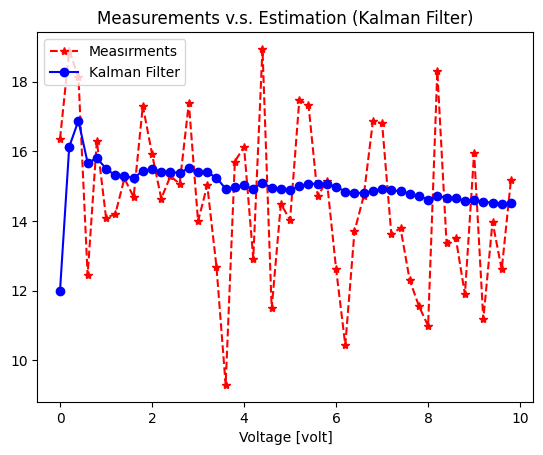

In [13]:
plt.plot(time,volt_meas_save,"r*--",label="Measırments")
plt.plot(time,volt_esti_save,"bo-",label="Kalman Filter")
plt.legend(loc="upper left")
plt.title("Measurements v.s. Estimation (Kalman Filter)")
plt.xlabel("Time [sec]")
plt.xlabel("Voltage [volt]")
plt.savefig("png/simple_kalman_filter.png")